In [1]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt




In [2]:
import json
import flask 
from flask import Flask, jsonify 

In [3]:
import numpy as np
import pandas as pd


In [4]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()
# Create an engine for the `emoji.sqlite` database
#engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)


In [6]:
Base = automap_base()

In [7]:
Base.prepare(engine, reflect=True)

In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement
Station = Base.classes.station

# Part 2 - Exploratory Climate Analysis

In [10]:
# Find the most recent date in the data set.
#most_recent_date = session.query(func.max(Measurement.date)).first()
#most_recent_date

In [12]:
session = Session(engine)

In [13]:
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23')

Text(0, 0.5, 'Inches')

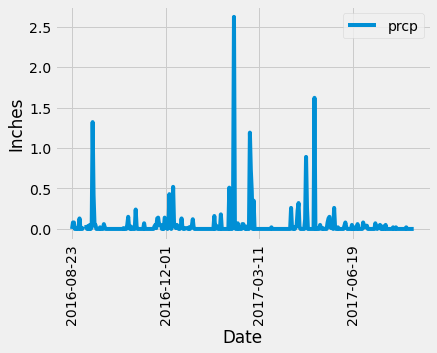

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_latest_record = '2016-08-23'
# Perform a query to retrieve the data and precipitation scores
query=f'''
    Select
        date, 
        prcp
    From
        measurement
    Where 
        date>= '{one_year_from_latest_record}'
    Group by 
        date
    '''

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df=pd.read_sql(query,conn)
prcp_df=prcp_df.set_index('date')

# Sort the dataframe by date

prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
#stations_data = pd.read_excel('Resources/hawaii_measurements.csv')
#stations_data.head()
stations_csv = "Resources/hawaii_measurements.csv"

In [18]:
station1_df = pd.read_csv(stations_csv)
station1_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. use sql querry
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. use sql querry

query = '''
    select
        station,
        count(*) as station_count
    from
        station
   
   
'''
active_stations_df = pd.read_sql(query, conn)
station_count= active_stations_df['station_count'].values[0]
print(f'there are {station_count} stations in the database.')

there are 9 stations in the database.


In [46]:
query = '''
    select
        station as station_code,
        count(*) as station_count
    from
        measurement
    group by station_code
    order by 
        station_count DESC
'''
active_stations_df=pd.read_sql(query,conn)
active_stations_df.head(10)

,station_code,station_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [36]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

active_stations_df.sort_values('station_count', ascending=False, inplace=True)
most_active_station=active_stations_df ['station_code'].values[0]

query = f'''
   SELECT *,
avg (tobs) as "average temp", 
min (tobs) as "min temp",
max (tobs) as "max temp"

FROM measurement
where station = "{most_active_station}"

'''
temp_obs_df=pd.read_sql(query,conn)
temp_obs_df

,id,station,date,prcp,tobs,average temp,min temp,max temp
0,14261,USC00519281,2015-09-10,0.09,85.0,71.663781,54.0,85.0


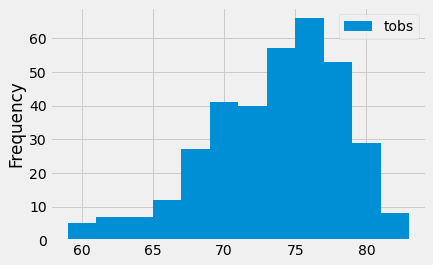

In [45]:
# Choose the station with the highest number of temperature observations. (need help not sure how to
# do just 12 months and need help with histogram)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = f'''
  select
    tobs
 
    from
        measurement
    where
            date >= '{one_year_from_latest_record}' 
            and station = '{most_active_station}'

'''
temp_obs_df= pd.read_sql(query, conn)
temp_obs_df.plot.hist(bins=12)

Bonus## Part 3 - Data Analysis Assignment

In [ ]:
#temp analysis 1 -Identify the avg temp in June at all stations across all available years in the dataset. Then 
#Do the same for December 


In [ ]:
#Use the T-set to determine whether the difference in the means, if any, is statisticallys significant. 

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
start_date= '2012-02-28'
end_date= '2012-03-05'
    
    # your code here

    #return # your code here

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    # your code here
    
    return # your code here
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
